*Installation of Qiskit*

In [ ]:
!pip install qiskit


__Installation of qiskit_machine_learning__


In [ ]:
!pip install qiskit_machine_learning


In [ ]:
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
#from qiskit.optimization import OptimizerResult
from qiskit.utils import QuantumInstance
from qiskit import Aer
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
algorithm_globals.random_seed = 12345

backend = Aer.get_backend('aer_simulator')

adhoc_dimension = 4
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension,
reps=2)
adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map,
quantum_instance=QuantumInstance(backend))



<ipython-input-6-add2d539c946>:9: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance=QuantumInstance(backend))


In [ ]:
pip install qiskit-aer


In [ ]:
qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7b51315b8af0>,
     random_state=12345, shrinking=True, tol=0.001, verbose=False)

__Define The Dataset__


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/new4.csv")
df.head(10)

,Stream,packet_count,src_dst_len,dst_src_len,freq_src_dst,freq_dst_src,prob_src_dst,prob_dst_src,total_prob_src_dst,total_prob_dst_src,total_prob,Attack Type
0,763.0,76.0,0.0,1514.0,0.0,3.0,0.000000,0.078947,0.000000,0.157895,0.157895,Password attacks
1,5755.0,20.0,87.0,0.0,1.0,0.0,0.058824,0.000000,0.294118,0.000000,0.350000,DDoS HTTP Flood Attacks
2,45.0,218.0,355.0,22942.0,2.0,0.0,0.009174,0.000000,0.311927,0.000000,0.183486,Vulnerability scanner attack
3,778.0,69.0,0.0,66.0,0.0,20.0,0.000000,0.625000,0.000000,0.108108,0.144928,Password attacks
4,518.0,78.0,74.0,0.0,7.0,0.0,0.179487,0.000000,0.128205,0.000000,0.141026,Password attacks
5,1419.0,30.0,85.0,0.0,1.0,0.0,0.066667,0.000000,0.600000,0.000000,0.400000,DDoS HTTP Flood Attacks
6,345.0,217.0,383.0,0.0,2.0,0.0,0.018519,0.000000,0.370370,0.000000,0.211982,Vulnerability scanner attack
7,5466.0,19.0,344.0,0.0,10.0,0.0,0.555556,0.000000,0.166667,0.000000,0.210526,DDoS HTTP Flood Attacks
8,11700.0,29.0,60.0,0.0,2.0,0.0,0.111111,0.000000,0.666667,0.000000,0.517241,DDoS HTTP Flood Attacks
9,716.0,77.0,0.0,74.0,0.0,7.0,0.000000,0.179487,0.000000,0.131579,0.142857,Password attacks


__DataSet Information__

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Stream              1000 non-null   float64
 1   packet_count        1000 non-null   float64
 2   src_dst_len         1000 non-null   float64
 3   dst_src_len         1000 non-null   float64
 4   freq_src_dst        1000 non-null   float64
 5   freq_dst_src        1000 non-null   float64
 6   prob_src_dst        1000 non-null   float64
 7   prob_dst_src        1000 non-null   float64
 8   total_prob_src_dst  1000 non-null   float64
 9   total_prob_dst_src  1000 non-null   float64
 10  total_prob          1000 non-null   float64
 11  Attack Type         1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [31]:
df = pd.read_csv("/content/new4.csv")
df = df.iloc[:1000]
x=df[['dst_src_len','src_dst_len','total_prob']]
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x)

x = pd.DataFrame(scaler.transform(x), columns=x.columns)


y=df['Attack Type']

y2=y
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(y)

y = label_encoder.transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

print("the y_train label are ",y)

the y_train label are  [ 5  1 10  5  5  1 10  1  1  5  6  6  5  2  1  1  8  6  1  5  8  1  1  1
  3  8 10  1  5  9  5  1  8  1  8  1 10 10  6  1  1  0  8  8  1  1 10 10
  3  1  2 10  6  5  9  1  1  5  1  1  6  1  9  1  1  6  9  6  9  1  5  8
  5  8  9  1  1  6  8 10  6 10  5  1  6  6  9  8  1  1 10  1 10  8  1  5
 10 10  1 10  9 10  8  1  1  5  8  1  0  1  1 10  5  1  6  9  5  1  5  1
  1  1  9  5  1  5  6  1 10  1  5  1  1 10  1  6  1  5  1  5  8 10  6  6
  6 10  9  1  9  9  8  8  1  9  4  6  5  1 10 10  3 10  9 10 10  8 10  5
 10  1 10  9  8  6 10  1 10  5  1  1  6 10  1  0  1  9 10 10  1  9  1  2
  5  8  5  5  1 10 10  7  5  1  9  8  6  8  6 10 10  1  8  1  1  9  1  1
 10  1  1 10  3  8  1  8 10  5  8 10  6  5  1  6 10  9  1 10  5  1  8  1
  8  1  5  5 10  1  8  5  6  5  8  5  5  5  9  6  1  5  9  6  6  1  1  1
  1 10  5 10  6  1 10  8  1  9 10  8 10  1  1  1  6  1  8 10  1  1 10  8
  8  9  9  5  1  9  6  1  8  1 10  5  8  1  9  1 10  5  0  5  4 10  1  1
 10  8 10  1  1  5  5  5  1 

**for y_train dataframe**


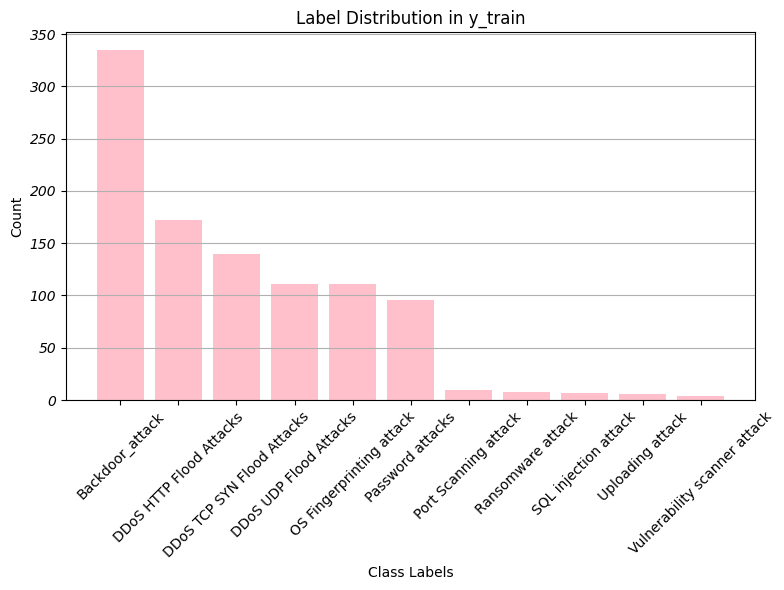

In [ ]:
import matplotlib.pyplot as plt
y_train_series = pd.Series(y2)


# Count the occurrences of each label in y_train and y_test
train_label_counts = y_train_series.value_counts()


# Get the unique class labels from the original y data
unique_labels = sorted(y_train_series.unique())

plt.figure(figsize=(8, 6))
plt.bar(unique_labels, train_label_counts, color='pink')
plt.title('Label Distribution in y_train')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(unique_labels, rotation=45)  # Rotate the y-labels by 45 degrees
plt.yticks(fontstyle='italic')  # Set the y-labels in italic form
plt.grid(axis='y')
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()




__fit the dataset in QSVC model__


In [ ]:
qsvc.fit(x_train,y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7b51315b8af0>,
     random_state=12345, shrinking=True, tol=0.001, verbose=False)

__print the shape of Dataset__

In [32]:
print("Shape of x_train dataset ",x_train.shape)
print("Shape of y_train dataset ",y_train.shape)
print("Shape of x_test dataset ",x_test.shape)
print("Shape of y_test dataset ",y_test.shape)

Shape of x_train dataset  (700, 3)
Shape of y_train dataset  (700,)
Shape of x_test dataset  (300, 3)
Shape of y_test dataset  (300,)


__testing the model using y_test__


In [ ]:
y_test_series = pd.Series(y_test)

# Get the sorted unique class names
class_names = sorted(y_test_series.unique())

# Rest of your code
class_times = {class_name: 0 for class_name in class_names}

for class_name in class_names:
    class_indices = y_test == class_name
    class_features = x_test[class_indices]
    class_start_time = pd.Timestamp.now()
    qsvc.predict(class_features)
    class_end_time = pd.Timestamp.now()
    class_times[class_name] = (class_end_time - class_start_time).total_seconds()


__to know the score and accuracy result of qsvc model__

In [ ]:
qsvc_score = qsvc.score(x_test,y_test)
qsvc_score

0.7066666666666667

__to plot the graph of y_test data__


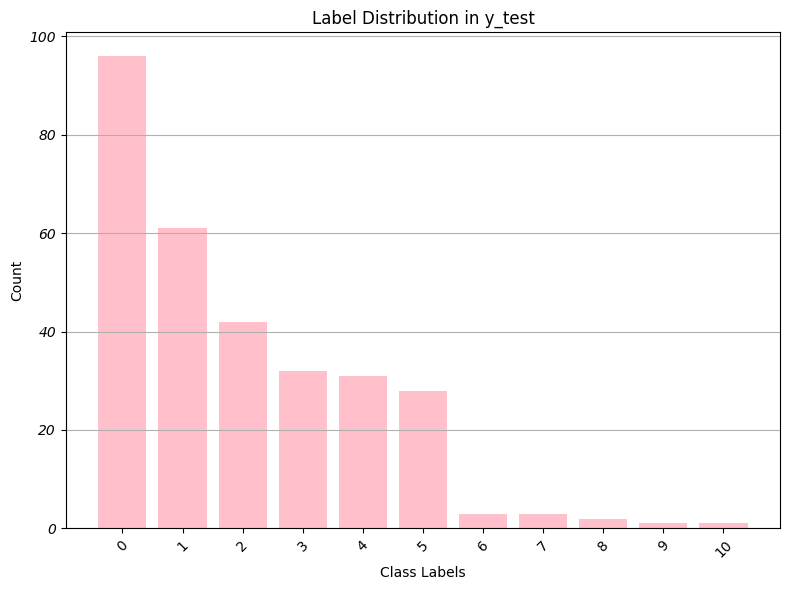

In [ ]:
y_train_series = pd.Series(y_test)


# Count the occurrences of each label in y_train and y_test
train_label_counts = y_train_series.value_counts()


# Get the unique class labels from the original y data
unique_labels = sorted(y_train_series.unique())

plt.figure(figsize=(8, 6))
plt.bar(unique_labels, train_label_counts, color='pink')
plt.title('Label Distribution in y_test')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(unique_labels, rotation=45)  # Rotate the y-labels by 45 degrees
plt.yticks(fontstyle='italic')  # Set the y-labels in italic form
plt.grid(axis='y')
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()




__code for predict the x_test and find the classification report and draw a graph for recall rate of prediction__

[10  8  6  8  1  5  6  6  5  1 10  5  1  5  8  6  6  1  5  5  8  1 10  5
  8 10 10  5  8  8  8  5  1  8  8  1  6  1  6  1  5 10 10  1  5  1  6  6
  6 10  5  1  1  6  1  5  1  6  8  1  8  6  8  1  8  5 10  1  5 10  1  5
 10  1  1  6  5  1  1  5  6  6  8  6  5 10  1  8  6  1  6 10  5  1  1  1
  1  1  5  6 10  5  1  5  1  1  5  1 10  8  6  5 10  8  1  8  8  8  8  6
  6  5  6  6  5  8  1  1  8 10  8  1 10  8  5  1  5  8  8  5  8  5  8 10
  5  1  6 10  5  1  1 10  5  8  6  5  8 10  6  5 10  6  5  6  6 10  8  5
 10 10  8  1  1 10  5  6  6  6  1  1 10  5  1  1  1  5  5  1  8  1  6  1
  6  6  6  1  9 10  8  8  6  8  8 10  5  1  8  8  6  5  6 10  6  8  6  5
  1  5 10  5  5  8  1  1  5 10  1  1  6  6  1  8  5  6  1  1  6  1  5  1
  5  6  6  1  6  1  1  6  6 10  5 10  1  1  8 10  1  5  6  1 10 10 10  5
  1  6  8  6  1  6  1  5  1  8 10  5  8  1 10  8  6  5  1  8  1  5  8  5
 10  8  5  8  1  1  1 10  5 10 10  6]
              precision    recall  f1-score   support

           0       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

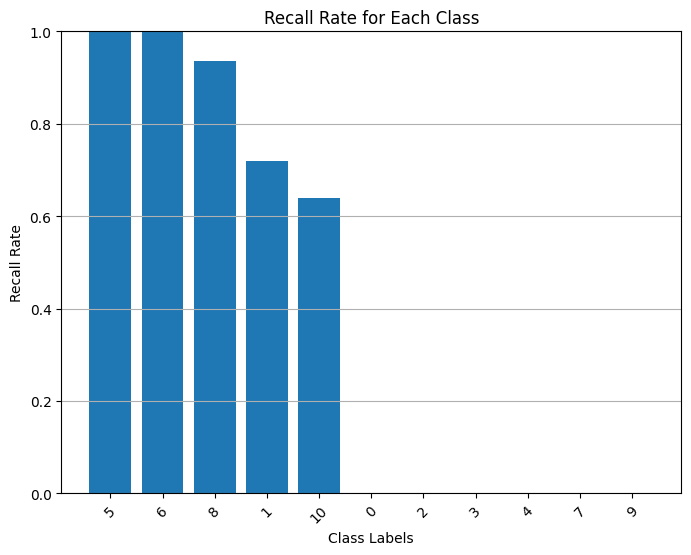

In [ ]:
qsvc_prediction = qsvc.predict(x_test)

print(qsvc_prediction)



print(f"{classification_report(y_test, qsvc_prediction)}")
report = classification_report(y_test,qsvc_prediction , output_dict=True)

# Extract the recall rates for each class from the classification report
recall_rates = {str(cls): report[str(cls)]['recall'] for cls in report.keys() if cls.isdigit()}

# Convert the recall rates dictionary to a DataFrame for easier plotting
import pandas as pd
recall_df = pd.DataFrame.from_dict(recall_rates, orient='index', columns=['Recall'])

# Sort the DataFrame by recall rates in descending order for a more informative plot
recall_df.sort_values(by='Recall', ascending=False, inplace=True)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(recall_df.index, recall_df['Recall'])
plt.title('Recall Rate for Each Class')
plt.xlabel('Class Labels')
plt.ylabel('Recall Rate')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.ylim(0, 1.0)  # Set the y-axis limits from 0 to 1
plt.grid(axis='y')
plt.show()


__Confusion Matrix__

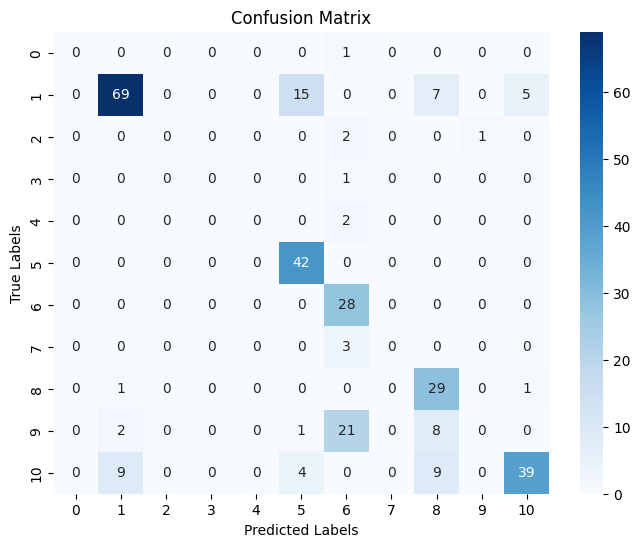

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, qsvc_prediction)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()